In [1]:
#20152534 최종헌
#8.1 MNIST 데이터 베이스
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


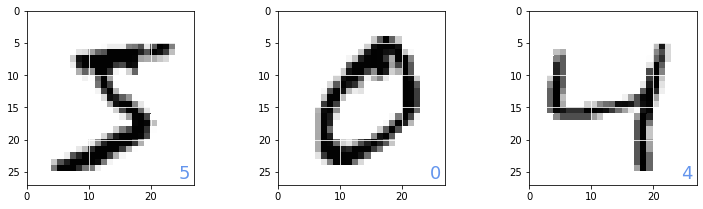

In [2]:
#20152534 최종헌
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1)
    img=x_train[id,:,:]
    plt.pcolor(255-img)
    plt.text(24.5,26,"%d" % y_train[id],color='cornflowerblue',fontsize=18)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.grid('on',color='white')
plt.show()

In [3]:
#20152534 최종헌
#8.2 2층 피드 포워드 네트워크 모델
from keras.utils import np_utils

x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
x_train=x_train/255
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)

np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
#20152534 최종헌
model=Sequential()
model.add(Dense(16,input_dim=784,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
#20152534 최종헌
import time
startTime=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print("Computation time:{0:.3f}sec".format(time.time()-startTime))

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 2.0117 - accuracy: 0.3728 - val_loss: 1.7345 - val_accuracy: 0.5578
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.5561 - accuracy: 0.6693 - val_loss: 1.3815 - val_accuracy: 0.7631
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2614 - accuracy: 0.7889 - val_loss: 1.1373 - val_accuracy: 0.8203
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 1.0531 - accuracy: 0.8257 - val_loss: 0.9615 - val_accuracy: 0.8450
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9012 - accuracy: 0.8474 - val_loss: 0.8312 - val_accuracy: 0.8578
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7871 - accuracy: 0.8602 - val_loss: 0.7325 - val_accuracy: 0.8699
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.8712 - val_loss: 0.6547 - val_accuracy: 0.8790
Epoch 8/10
60/60 [==

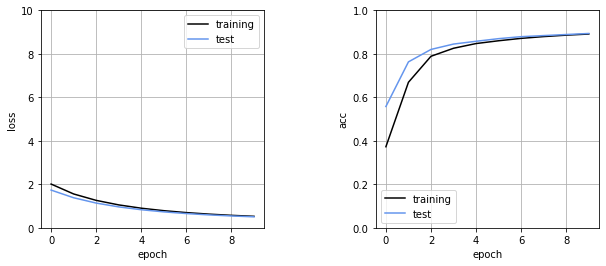

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
#20152534 최종헌
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='training',color='black')
plt.plot(history.history['val_loss'],label='test',color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#20152534 최종헌
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training',color='black')
plt.plot(history.history['val_accuracy'],label='test',color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

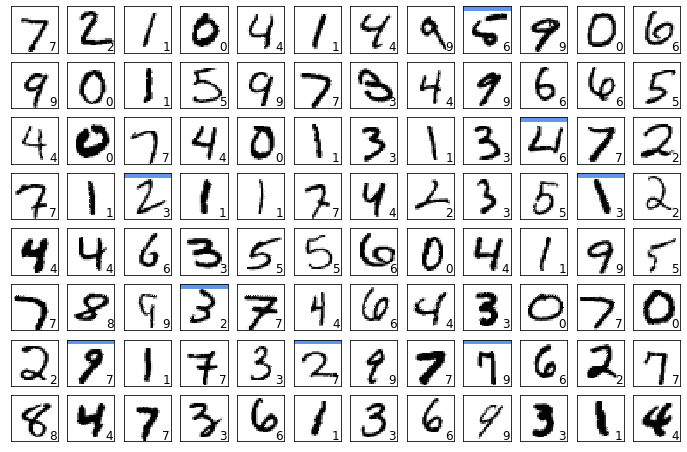

In [5]:
#20152534 최종헌
def show_prediction():
    n_show=96
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=np.argmax(wk)
        plt.text(22,25.5,"%d"%prediction,fontsize=12)
        if prediction!=np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")
#20152534 최종헌
show_prediction()
plt.show()

In [7]:
#20152534 최종헌
#8.3 ReLU 활성화 함수
np.random.seed(1)
import time
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
#20152534 최종헌
model=Sequential()
model.add(Dense(16,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

#20152534 최종헌
startTime=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test accuracy',score[1])
print("Computation time:{0:.3f}sec".format(time.time()-startTime))

Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 1.4903 - accuracy: 0.5802 - val_loss: 0.8321 - val_accuracy: 0.8183
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.8490 - val_loss: 0.4672 - val_accuracy: 0.8818
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.8869 - val_loss: 0.3767 - val_accuracy: 0.9004
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.9003 - val_loss: 0.3378 - val_accuracy: 0.9088
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.9080 - val_loss: 0.3162 - val_accuracy: 0.9135
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.9124 - val_loss: 0.2984 - val_accuracy: 0.9178
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.9166 - val_loss: 0.2862 - val_accuracy: 0.9207
Epoch 8/10
60/60 [==

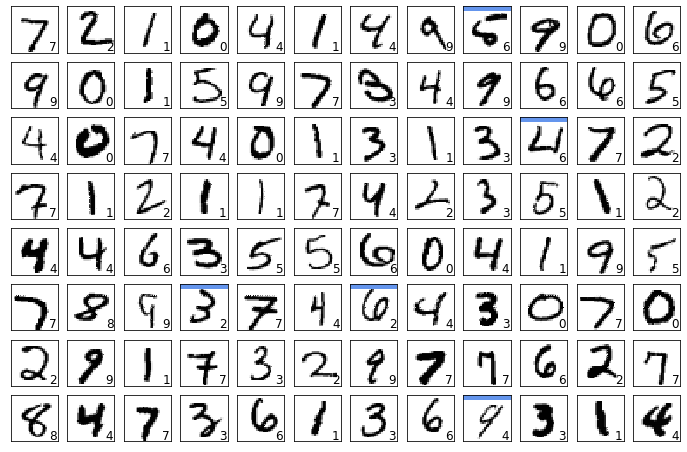

In [8]:
#20152534 최종헌
show_prediction()
plt.show()

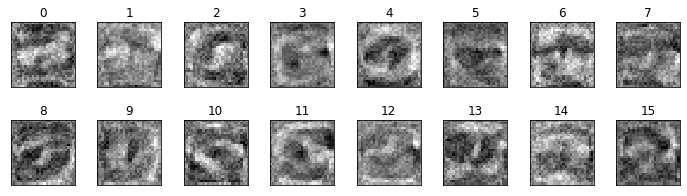

In [9]:
#20152534 최종헌
w=model.layers[0].get_weights()[0]
plt.figure(1,figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35,hspace=0.5)
for i in range(16):
    plt.subplot(2,8,i+1)
    w1=w[:,i]
    w1=w1.reshape(28,28)
    plt.pcolor(-w1)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")
    plt.title("%d"%i)
plt.show()
#20152534 최종헌

In [10]:
#8.4 공간 필터
#20152534 최종헌
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


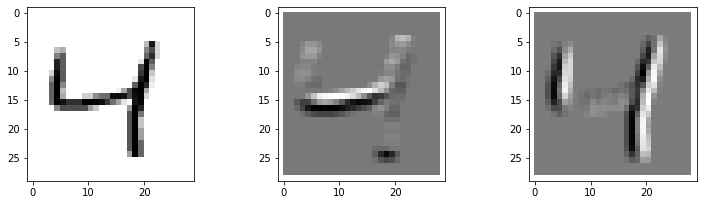

In [13]:
#20152534 최종헌
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)
#20152534 최종헌
import matplotlib.pyplot as plt
%matplotlib inline
id_img=2
myfil1=np.array([[1,1,1],[1,1,1],[-2,-2,-2]],dtype=float)
myfil2=np.array([[-2,1,1],[-2,1,1],[-2,1,1]],dtype=float)
x_img=x_train[id_img,:,:,0]
img_h=28
img_w=28
x_img=x_img.reshape(img_h,img_w)
out_img1=np.zeros_like(x_img)
out_img2=np.zeros_like(x_img)
for ih in range(img_h-3):
    for iw in range(img_w-3):
        img_part=x_img[ih:ih+3,iw:iw+3]
        out_img1[ih+1,iw+1]=np.dot(img_part.reshape(-1),myfil1.reshape(-1))
        out_img2[ih+1,iw+1]=np.dot(img_part.reshape(-1),myfil2.reshape(-1))
#20152534 최종헌     
plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1-x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()
#20152534 최종헌    

In [14]:
#20152534 최종헌
#8.5 합성곱 신경망
import numpy as np
np.random.seed(1)
import time
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.optimizers import Adam
#20152534 최종헌
model=Sequential()
model.add(Conv2D(8,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
#20152534 최종헌
startTime=time.time()
history=model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test accuracy',score[1])
print("Computation time:{0:.3f}sec".format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 3s 45ms/step - loss: 0.8309 - accuracy: 0.8028 - val_loss: 0.3625 - val_accuracy: 0.9010
Epoch 2/20
60/60 [==============================] - 3s 45ms/step - loss: 0.3317 - accuracy: 0.9046 - val_loss: 0.2891 - val_accuracy: 0.9172
Epoch 3/20
60/60 [==============================] - 3s 46ms/step - loss: 0.2756 - accuracy: 0.9227 - val_loss: 0.2467 - val_accuracy: 0.9286
Epoch 4/20
60/60 [==============================] - 3s 46ms/step - loss: 0.2365 - accuracy: 0.9333 - val_loss: 0.2137 - val_accuracy: 0.9400
Epoch 5/20
60/60 [==============================] - 3s 45ms/step - loss: 0.2029 - accuracy: 0.9430 - val_loss: 0.1873 - val_accuracy: 0.9471
Epoch 6/20
60/60 [==============================] - 3s 47ms/step - loss: 0.1752 - accuracy: 0.9513 - val_loss: 0.1679 - val_accuracy: 0.9538
Epoch 7/20
60/60 [==============================] - 3s 47ms/step - loss: 0.1522 - accuracy: 0.9584 - val_loss: 0.1465 - val_accuracy: 0.9587
Epoch 8/20
60

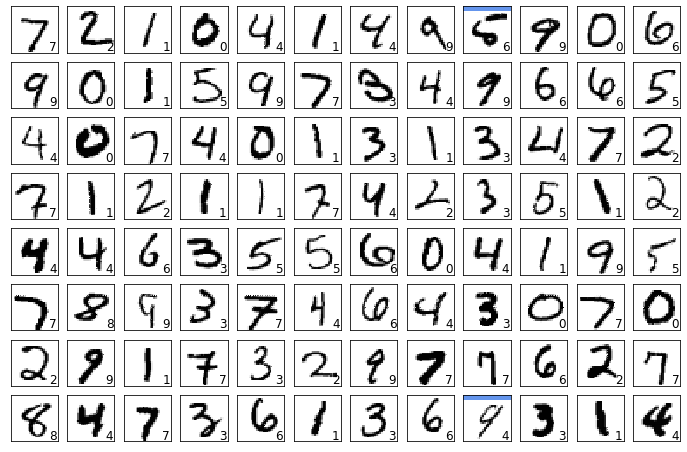

In [17]:
#20152534 최종헌
def show_prediction():
    n_show=96
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=np.argmax(wk)
        plt.text(22,25.5,"%d"%prediction,fontsize=12)
        if prediction!=np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")
show_prediction()
plt.show()
#20152534 최종헌

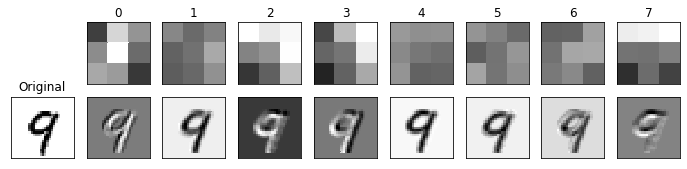

In [19]:
#20152534 최종헌
plt.figure(1,figsize=(12,2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2,hspace=0.2)
plt.subplot(2,9,10)
id_img=12
x_img=x_test[id_img,:,:,0]
img_h=28
img_w=28
x_img=x_img.reshape(img_h,img_w)
plt.pcolor(-x_img)
plt.xlim(0,img_h)
plt.ylim(img_w,0)
plt.xticks([],"")
plt.yticks([],"")
plt.title("Original")
w=model.layers[0].get_weights()[0]
max_w=np.max(w)
min_w=np.min(w)
#20152534 최종헌
for i in range(8):
    plt.subplot(2,9,i+2)
    w1=w[:,:,0,i]
    w1=w1.reshape(3,3)
    plt.pcolor(-w1,vmin=min_w,vmax=max_w)
    plt.xlim(0,3)
    plt.ylim(3,0)
    plt.xticks([],"")
    plt.yticks([],"")
    plt.title("%d"%i)
    plt.subplot(2,9,i+11)
    out_img=np.zeros_like(x_img)
    for ih in range(img_h-3):
        for iw in range(img_w-3):
            img_part=x_img[ih:ih+3,iw:iw+3]
            out_img[ih+1,iw+1]=np.dot(img_part.reshape(-1),w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0,img_w)
    plt.ylim(img_h,0)
    plt.xticks([],"")
    plt.yticks([],"")
plt.show()
#20152534 최종헌

In [20]:
#20152534 최종헌
#8.8 MNIST 인식 네트워크 모델
import numpy as np
np.random.seed(1)
import time
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
#20152534 최종헌
model=Sequential()
model.add(Conv2D(16,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
#20152534 최종헌
startTime=time.time()
history=model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test accuracy',score[1])
print("Computation time:{0:.3f}sec".format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 27s 451ms/step - loss: 0.6403 - accuracy: 0.8071 - val_loss: 0.1388 - val_accuracy: 0.9562
Epoch 2/20
60/60 [==============================] - 27s 457ms/step - loss: 0.1400 - accuracy: 0.9575 - val_loss: 0.0710 - val_accuracy: 0.9769
Epoch 3/20
60/60 [==============================] - 27s 453ms/step - loss: 0.0909 - accuracy: 0.9717 - val_loss: 0.0471 - val_accuracy: 0.9844
Epoch 4/20
60/60 [==============================] - 27s 456ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0374 - val_accuracy: 0.9877
Epoch 5/20
60/60 [==============================] - 30s 495ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 6/20
60/60 [==============================] - 28s 468ms/step - loss: 0.0500 - accuracy: 0.9839 - val_loss: 0.0302 - val_accuracy: 0.9891
Epoch 7/20
60/60 [==============================] - 27s 454ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0261 - val_accuracy: 0.9915

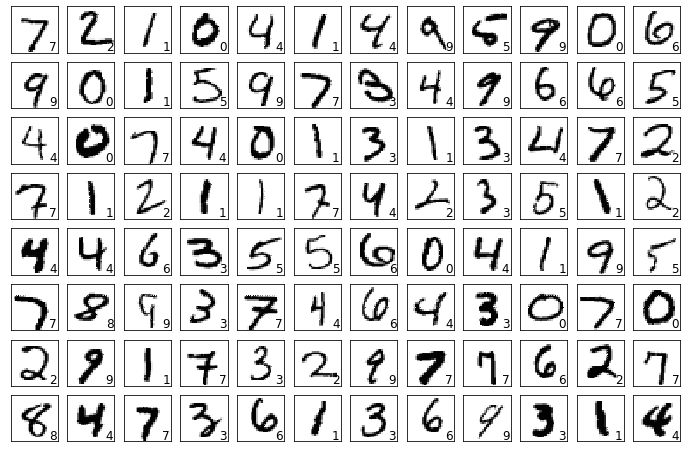

In [21]:
#20152534 최종헌
show_prediction()
plt.show()